# Calculs d'indicateurs journaliers pour les données hmvl DIRMED
## 0. Initialisation

In [1]:
import pandas as pd
import matplotlib
import psycopg2
import arrow
import numpy as np

In [36]:
import scriptindic as scr

In [3]:
host="localhost"
port=5432
dbname="hmvl"
username="dirmed"
#pwd="votremotdepasse"
# à remplacer par votre de mot de passe et surtout ne pas publier en ligne!!!

In [5]:
LABOCOM=['MBS','MPH','MPB','MPA','MPG','MPF','MBO']

## 1. Lecture des données hmvl pour une journée

## 1.1. Lecture en base postgres

In [45]:
import importlib
importlib.reload(scr)

<module 'scriptindic' from '/home/patgendre/windows/Users/pmgen/Documents/infomobi/essais/test-hmvl/hmvl/scriptindic.py'>

In [46]:
hmvl=scr.lirejourhmvl("2020-04-26",host,port,dbname,username,pwd)

In [52]:
hmvl

,hdt,station,status,voie,vitesse,longueur,statuttr
0,2020-07-22 00:36:42+02:00,M7q,2,NaN,NaN,NaN,NaN
1,2020-07-22 00:36:42+02:00,M7Q,2,NaN,NaN,NaN,NaN
2,2020-07-22 00:36:42+02:00,M3j,2,NaN,NaN,NaN,NaN
3,2020-07-22 00:36:42+02:00,M3q,2,NaN,NaN,NaN,NaN
4,2020-07-22 00:36:42+02:00,M3z,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7441782,2020-07-22 23:59:41.067000+02:00,MPH,NaN,2,108.0,4.0,B
7441783,2020-07-22 23:59:46.010000+02:00,MPH,NaN,0,89.0,16.5,B
7441784,2020-07-22 23:59:46.031000+02:00,MPH,NaN,1,NaN,NaN,B
7441785,2020-07-22 23:59:51.085000+02:00,MPH,NaN,3,126.0,5.4,B


## 1.2 lecture d'un fichier csv pour une journée

In [50]:
nomcsv='/home/patgendre/windows/Users/pmgen/Documents/infomobi/essais/test-hmvl/2020-07-22.csv'
hmvl=scr.lirecsvhmvl(nomcsv)

2020-08-21 17:42:05.621857
2020-08-21 17:42:39.372938 après lecture du csv


## 3. Calcul d'indicateurs par station et par heure pour un jour donné

In [12]:
# indicateurs : nbmes, nbmes_vitesse, nbmes_longueur, nb_status2, nb_status1, nb_status34, 
#               nb_sansvoie, nb_l_aberr, nb_v_aberr
# création d'un dataframe d'indicateurs qualité, exportable ensuite en CSV et/ou en BD postgres
# seuils de longueurs et vitesse aberrantes "en dur"
Lmin=0.8
Lmax=25.0
Vmax=250.0


In [ ]:
qualite=scr.indicqualite(hmvl)

In [51]:
qualite

,station,heure,nb_mes,nbmesvit,nbmeslong,nb_status2,nb_status1,nb_status34,nb_sansvoie,nb_l_aberr,nb_v_aberr,taux_trames_absentes
0,M1B,2020-04-26 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,M1B,2020-04-26 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,M1B,2020-04-26 02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,M1B,2020-04-26 03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,M1B,2020-04-26 04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3499,MPH,2020-04-26 19:00,332.0,237.0,237.0,0.0,1.0,0.0,2.0,1.0,1.0,67.17
3500,MPH,2020-04-26 20:00,239.0,170.0,170.0,0.0,0.0,0.0,1.0,0.0,0.0,75.17
3501,MPH,2020-04-26 21:00,125.0,93.0,93.0,0.0,1.0,0.0,5.0,0.0,0.0,85.17
3502,MPH,2020-04-26 22:00,136.0,95.0,95.0,0.0,1.0,0.0,15.0,1.0,0.0,83.83


## 4. Calcul des données 6 minutes à partir d'un dataframe hmvl, en principe pour une journée

In [53]:
moy6=scr.agreg6(hmvl)


/home/patgendre/windows/Users/pmgen/Documents/infomobi/essais/test-hmvl/hmvl/scriptindic.py:148: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t0=[]


In [54]:
moy6

l6      v6   q6
station hdt                                         
M1B     2020-07-22 00:30:00+02:00  3.96   89.09  115
        2020-07-22 00:36:00+02:00  4.27   91.33  132
        2020-07-22 00:42:00+02:00  4.10   91.71  109
        2020-07-22 00:48:00+02:00  3.91   94.05  126
        2020-07-22 00:54:00+02:00  4.01   94.46  102
...                                 ...     ...  ...
MPH     2020-07-22 23:30:00+02:00  9.07  100.30   46
        2020-07-22 23:36:00+02:00  9.26   98.91   57
        2020-07-22 23:42:00+02:00  8.79   99.50   52
        2020-07-22 23:48:00+02:00  6.95  102.14   41
        2020-07-22 23:54:00+02:00  7.82  102.08   43

[26508 rows x 3 columns]

## 6. stockage des indicateurs


In [249]:
# le stockage en base n'est pas jugé utile


In [250]:
scr.ecrireagreg6(moy6,pwd)
# écriture en base pg, fonction obsolète

In [275]:
def tocsv(m,file):
	# fonction écrivant les données agrégées 6' en base : en entrée dataframe q produit par la fonction indicqualite
	#                                                      ou dataframe m produit par la fonction agreg6
	#   et nom du fichier
	# suppose qu'existe la table moy6 avec le même schéma (colonnes)
	# pour l'instant l'horodate est encodée comme une string en base
	m=m.reset_index()
	m.to_csv(path_or_buf=file, index=False)


In [276]:
tocsv(qualite,'/home/patgendre/windows/Users/pmgen/Documents/infomobi/essais/test-hmvl/q264.csv')

In [277]:
tocsv(moy6,'/home/patgendre/windows/Users/pmgen/Documents/infomobi/essais/test-hmvl/m264.csv')


## quelques essais de graphes

station
M1B    AxesSubplot(0.125,0.125;0.775x0.755)
M1C    AxesSubplot(0.125,0.125;0.775x0.755)
M1D    AxesSubplot(0.125,0.125;0.775x0.755)
M1E    AxesSubplot(0.125,0.125;0.775x0.755)
M1F    AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
MPA    AxesSubplot(0.125,0.125;0.775x0.755)
MPB    AxesSubplot(0.125,0.125;0.775x0.755)
MPF    AxesSubplot(0.125,0.125;0.775x0.755)
MPG    AxesSubplot(0.125,0.125;0.775x0.755)
MPH    AxesSubplot(0.125,0.125;0.775x0.755)
Name: nbmesvit, Length: 146, dtype: object

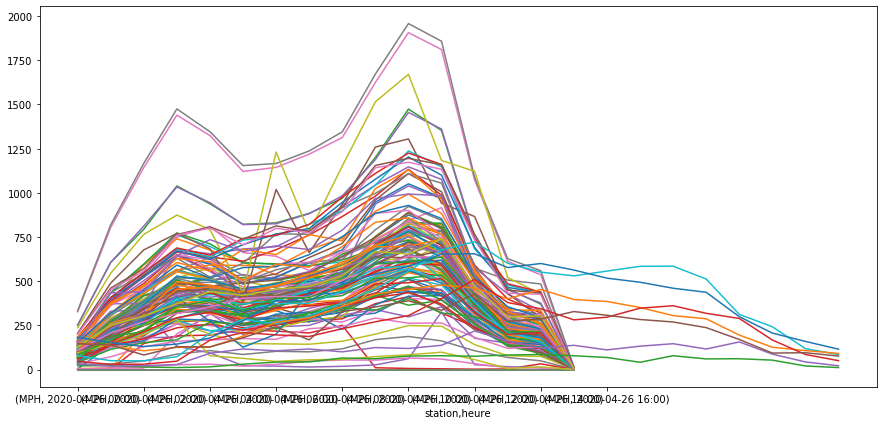

In [203]:
# nb de mesures par heure (donc débit horaire), 1 courbe par station
qualite['nbmesvit'].groupby('station').plot(figsize=(15,7))

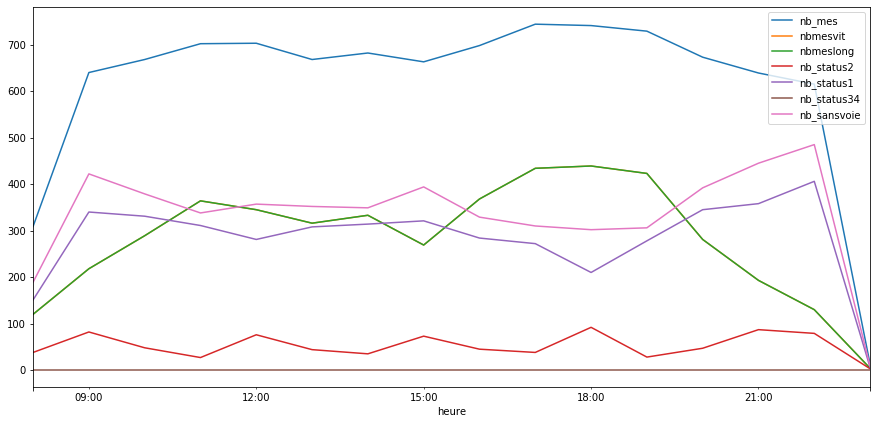

In [211]:
qualite.loc['M1B'].plot(figsize=(15,7))

In [17]:
len(hmvl)


4501658

In [101]:
hmvl.head()

,id,hdt0,hdt,station,status,voie,vitesse,longueur,statuttr
0,9672656,2020-04-26 23:59:00+02:00,2020-04-26 23:59:58.520000+02:00,MPA,None,2,87.0,17.0,@
1,9684030,2020-04-26 23:59:00+02:00,2020-04-26 23:59:50.620000+02:00,MPG,None,2,126.0,3.9,B
2,9665892,2020-04-26 23:59:00+02:00,2020-04-26 23:59:30.800000+02:00,MBS,None,2,78.0,16.9,@
3,9692353,2020-04-26 23:59:00+02:00,2020-04-26 23:59:19.170000+02:00,MPH,None,2,91.0,17.2,B
4,9656651,2020-04-26 23:59:00+02:00,2020-04-26 23:59:00.450000+02:00,MBO,None,2,85.0,3.6,@


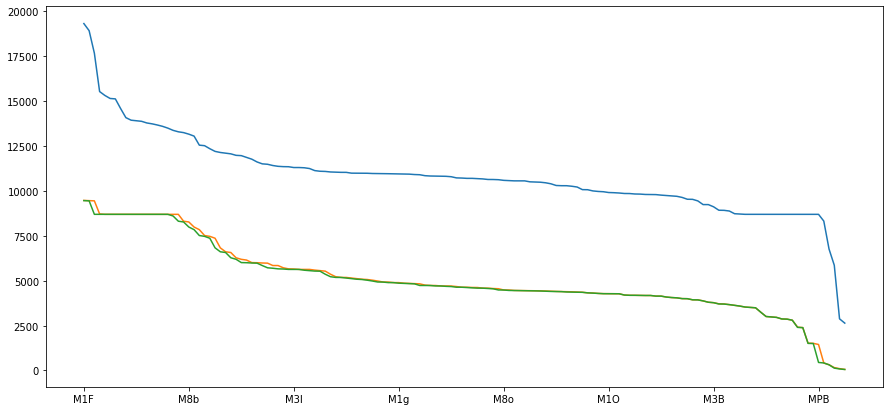

In [212]:
hmvl["station"].value_counts().plot(figsize=(15,7))
hmvl[hmvl["vitesse"].isna()]["station"].value_counts().plot()
hmvl[hmvl["longueur"].isna()]["station"].value_counts().plot()
# Il reste quelaques (une dizaine de stations) avec des vitesses ou longueurs vides
# là aussi on pourrait calculer un indicateur par station et par jour
# et le stocker en base


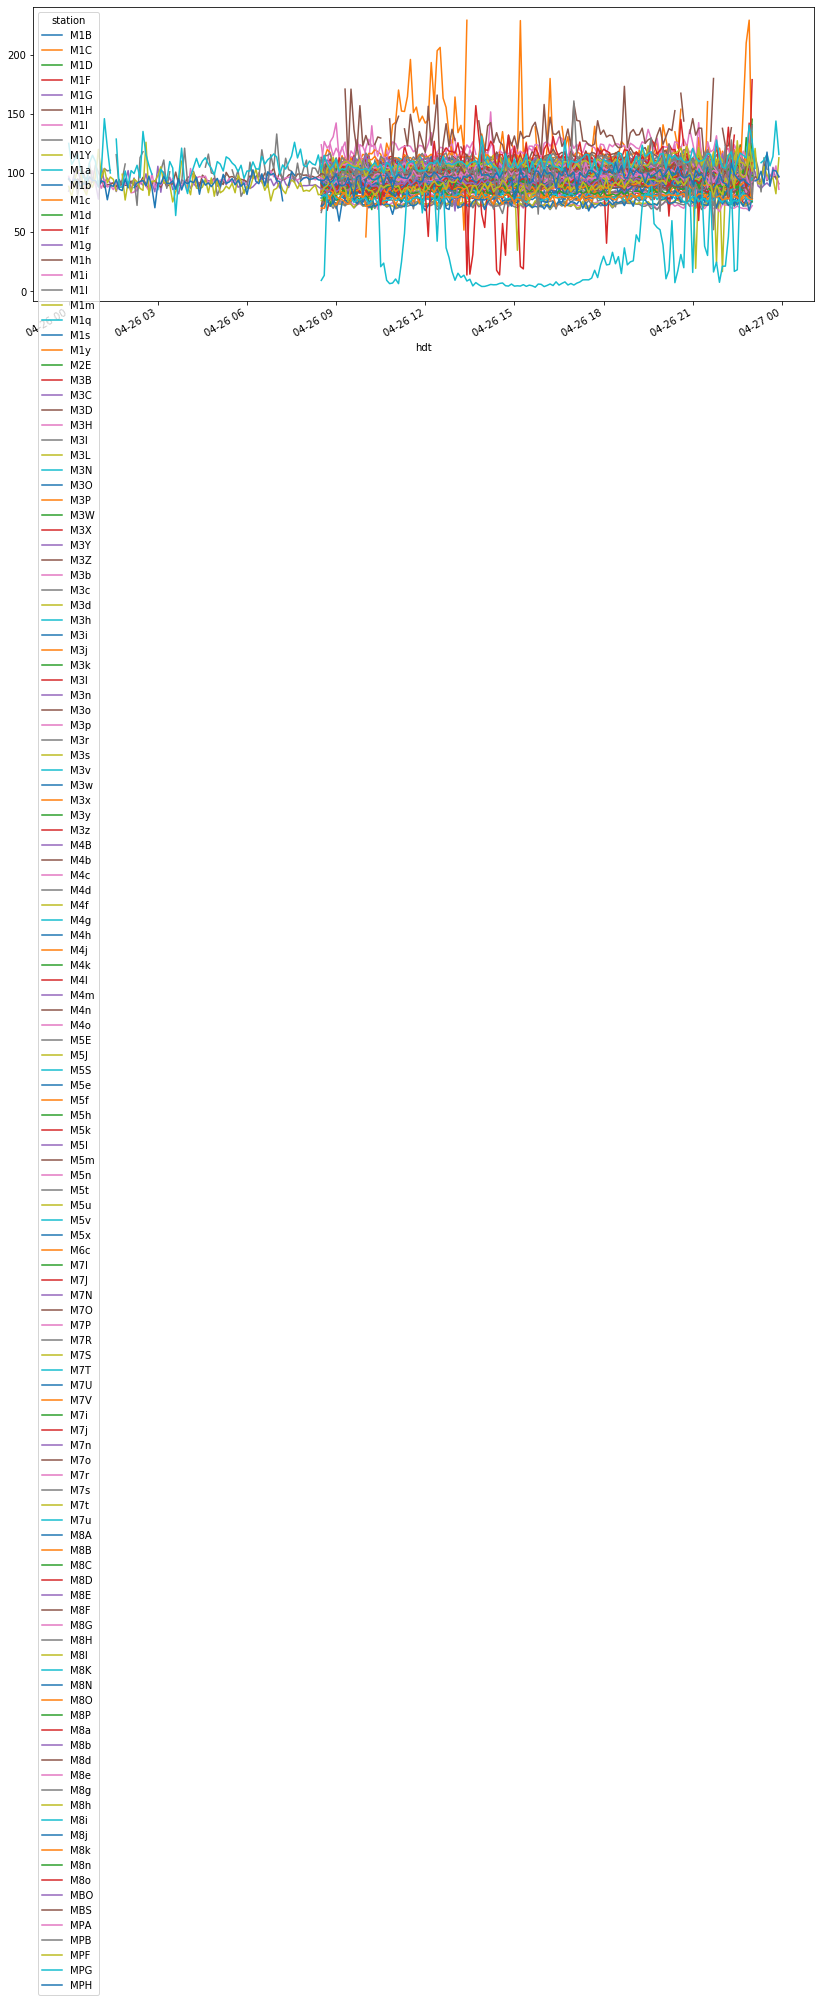

In [213]:
moy6['v6'].unstack().T.plot(figsize=(14,6))
# avant 10H on a seulement les données LABOCOM

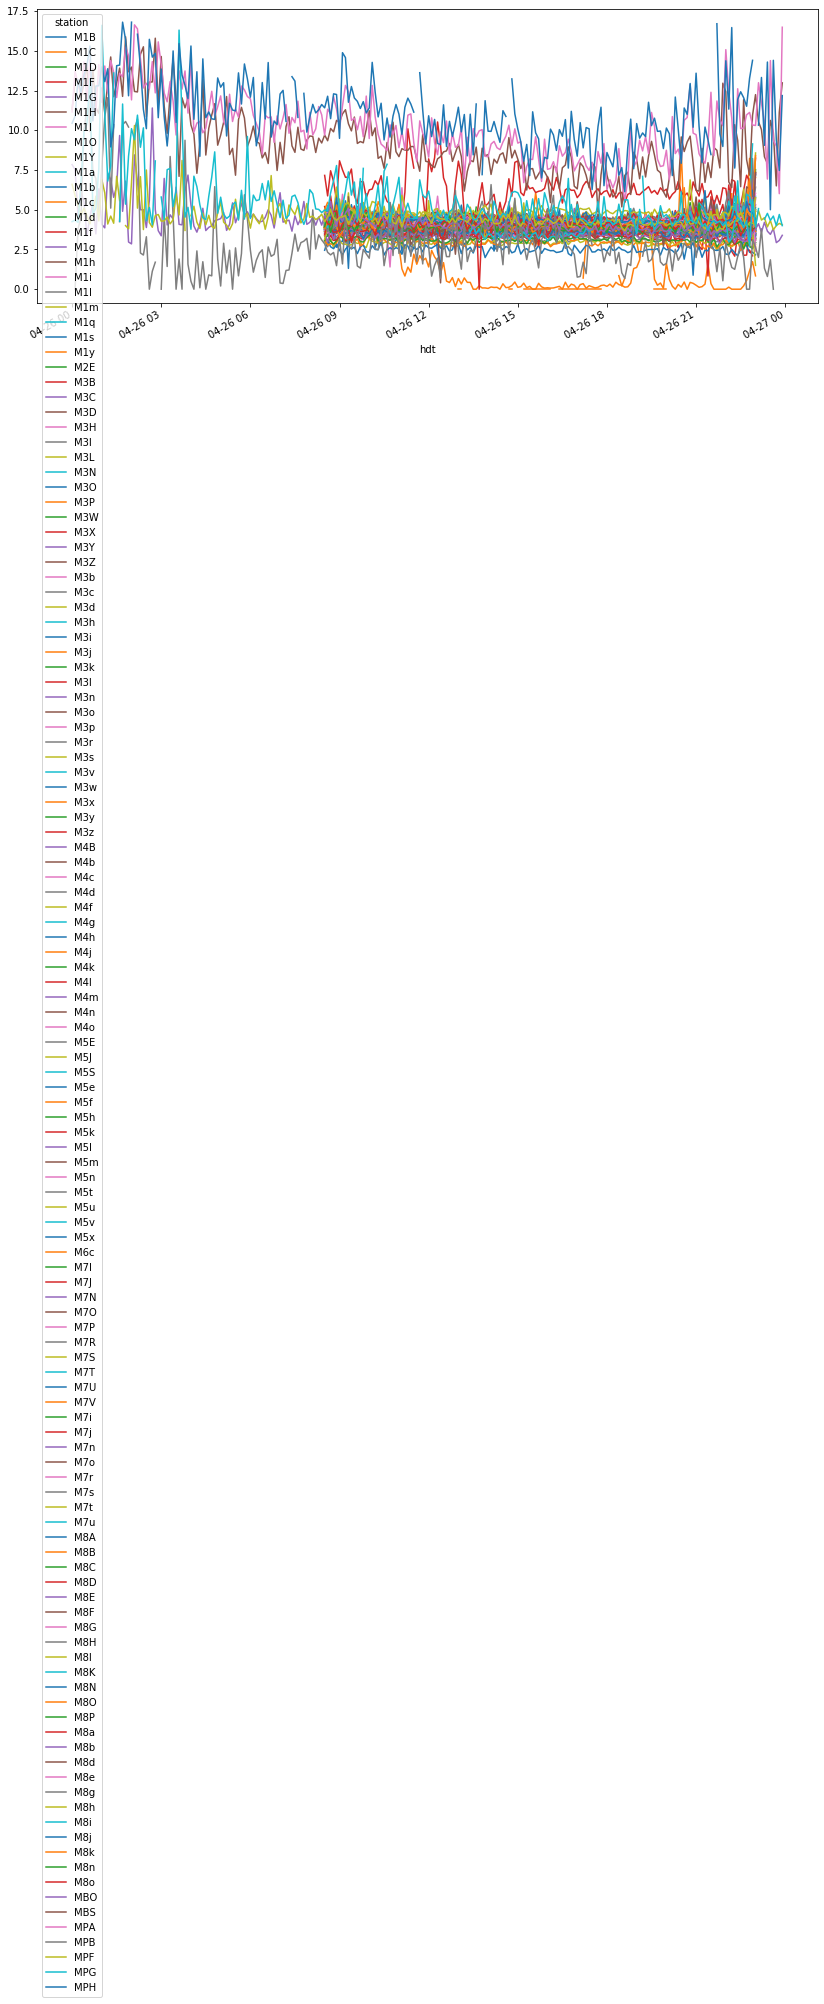

In [214]:
moy6['l6'].unstack().T.plot(figsize=(14,6))

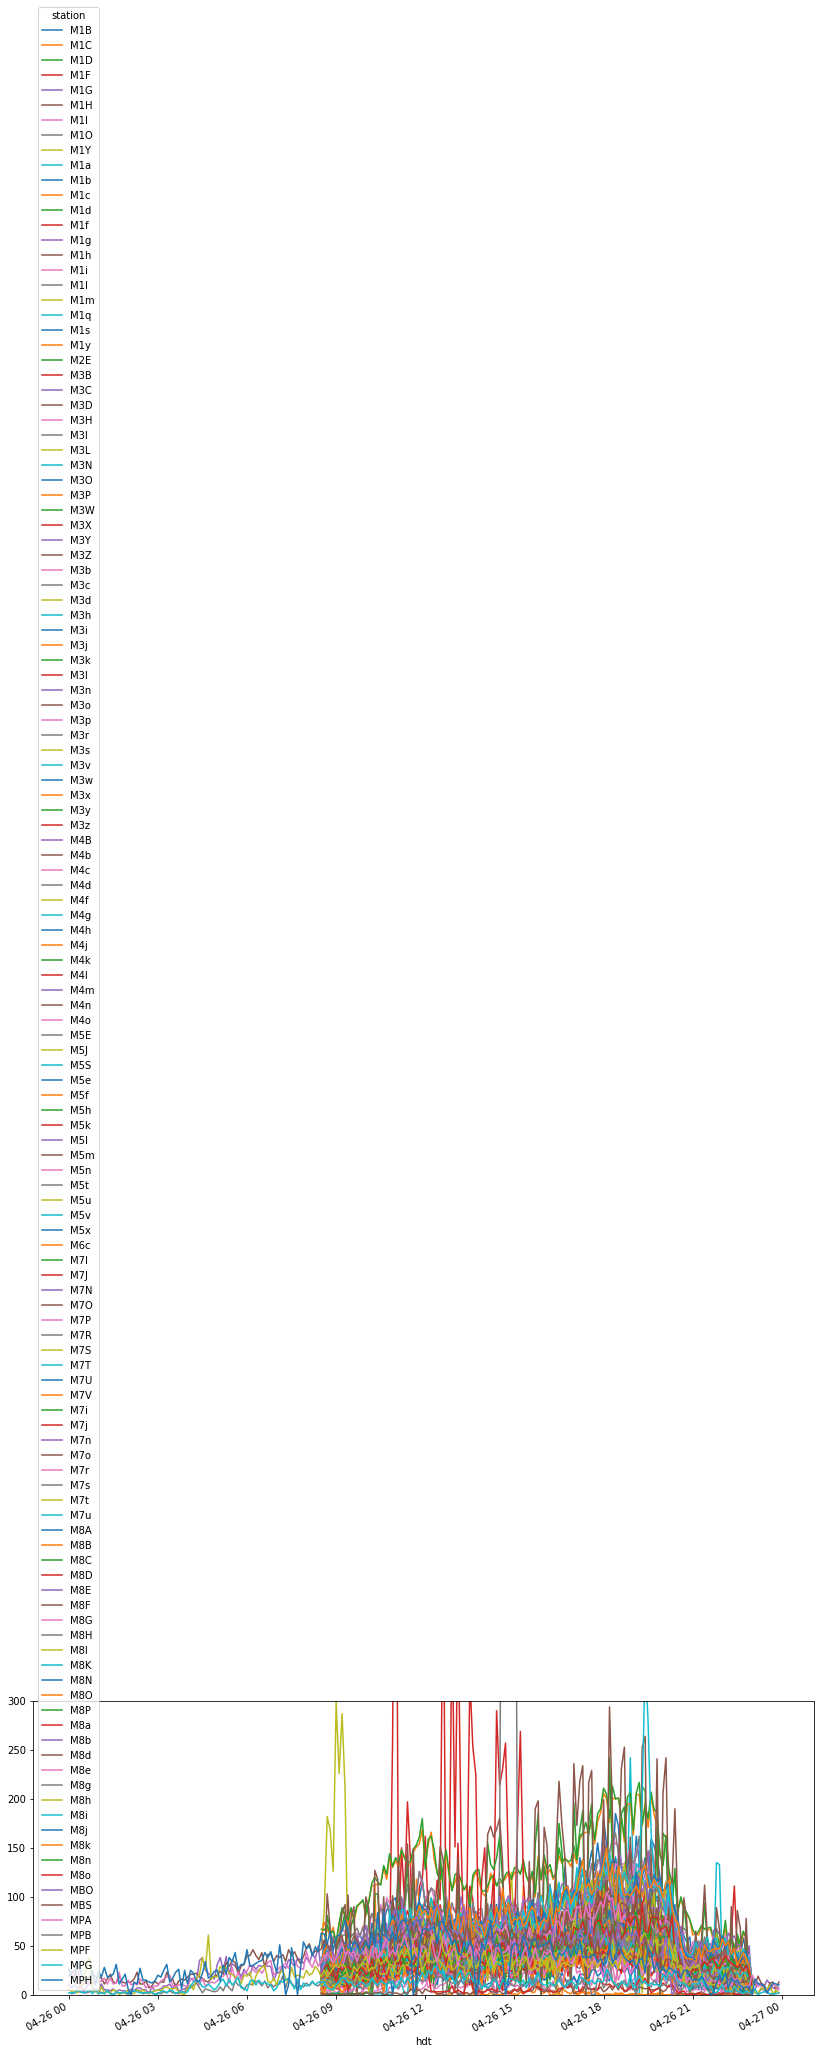

In [215]:
moy6['q6'].unstack().T.plot(figsize=(14,6),ylim=(0,300))
# on n'affiche pas les débits > 300 par 6' qui sont a priori trop élevés??

### seuils de mesures aberrantes?

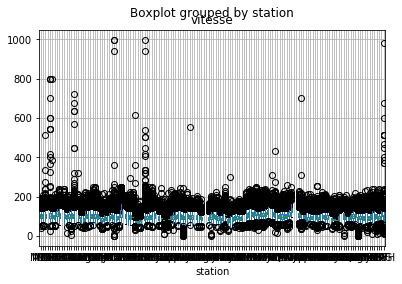

In [216]:
hmvl.boxplot(column=["vitesse"],by="station")
# ça semble raisonnable de prendre 240 comme valeur seuil de vitesse

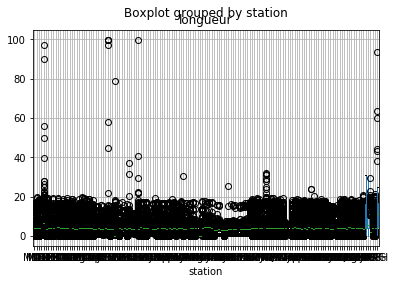

In [217]:
hmvl.boxplot(column=["longueur"],by="station")
# ça semble raisonnable de prendre 25 comme valeur seuil de longueur, 
# mais il y a peut être valeur plus pertinente pour le métier, à cause des Transports Exceptionnels par exemple?
# ou pour voir passer les convois ITER s'ils empruntent le réseau DIRMED?

In [218]:
print(hmvl['voie'].value_counts())
# on a éliminé de hmvl les mesures sans numéro de voie
# il y a des voies de 0 à 5 selon les Points de Mesure
# certaines voies correspondent peut être à des bretelles, attention pour l'agrégation?
sum(pd.isna(hmvl['voie']))

0    399281
1    281989
2    120687
3     58672
4     25850
5      2932
Name: voie, dtype: int64


694384

In [129]:
s6=pd.date_range('2020-04-26 10:00:00', periods=6000, freq='6S')

In [132]:
h0=hmvl['hdt0'].unique()

In [16]:
print(len(hmvl[hmvl['vitesse']==0.0]))
# 87 valeurs de vitesse sur 1M+ sont nullesprint(len(hmvl[hmvl['vitesse']==0.]))

87


In [164]:
arrow.get(hmvl['hdt0'].iloc[10000]).format("YYYY-MM-DD HH:mm:ss")
#arrow.get(s6[100]).format("YYYY-MM-DD HH:mm:ss")

'2020-04-26 22:54:48'

### qualifier les données par voie pas par station?

In [45]:
M8i=hmvl[hmvl["station"]=="M8i"]
M8i.head(5)
# sur cette exemple on voit qu'il faudrait peut être regardé non pas station par station
# mais voie par voie si les mesures sont manquantes!!

,id,hdt0,station,voie,vitesse,longueur,statuttr
hdt,,,,,,,
2020-04-25 08:40:36.300000+02:00,337,2020-04-25 08:40:24+02:00,M8i,0,81.0,3.6,B
2020-04-25 08:40:36.540000+02:00,338,2020-04-25 08:40:24+02:00,M8i,2,NaN,NaN,B
2020-04-25 08:41:11.700000+02:00,913,2020-04-25 08:40:42+02:00,M8i,2,NaN,NaN,B
2020-04-25 08:41:13.400000+02:00,914,2020-04-25 08:40:42+02:00,M8i,2,NaN,NaN,B
2020-04-25 08:41:13.460000+02:00,915,2020-04-25 08:40:42+02:00,M8i,1,7.0,1.7,B


56638

### RECHERCHE DES DOUBLONS

In [41]:
hmvl.index.value_counts()
# il reste des doublons, à investiguer, ça peut expliquer les débits aberrants

2020-04-27 16:32:14.890000+02:00    9
2020-04-27 11:52:53.310000+02:00    8
2020-04-27 15:31:37.690000+02:00    7
2020-04-27 08:36:22.230000+02:00    7
2020-04-25 12:36:34.680000+02:00    7
                                   ..
2020-04-25 16:37:37.260000+02:00    1
2020-04-26 17:39:54.160000+02:00    1
2020-04-27 13:12:19.760000+02:00    1
2020-04-25 10:11:57.650000+02:00    1
2020-04-26 08:33:41.990000+02:00    1
Name: hdt, Length: 3752405, dtype: int64

In [8]:
hmvl.head(5)

,id,hdt,station,voie,vitesse,longueur,statuttr
8,9,2020-04-25 06:40:24.620000+00:00,M3d,0,81.0,4.0,B
11,12,2020-04-25 06:40:29.180000+00:00,M5h,1,75.0,3.0,B
12,13,2020-04-25 06:40:26.260000+00:00,M5l,3,87.0,4.1,B
13,14,2020-04-25 06:40:30.830000+00:00,M3j,0,71.0,4.9,@
14,15,2020-04-25 06:40:31.800000+00:00,M3j,1,90.0,4.0,@


In [46]:
print(str(len(hmvl.groupby("hdt")["id"].unique())))
print(str(len(hmvl.groupby(["hdt","station","voie"])["id"].unique())))
# sur 4,3M mesures, seulement 52092 correspondent à une seule horodate

3752405
4498929


In [48]:
len(hmvl)- 4498929
# 2729 doublons hdt+station+voie sur 4,5M de mesures
# idéalement il faudrait les supprimer

2729

In [9]:
id_hv=hmvl.groupby(["hdt","station","voie"])["id"].unique()
id_hv.apply(len).value_counts()
# sur 1,8M mesures, il y désormais très peu de doublons, moins de 1 pour mille
# 

1    4331949
2       2729
Name: id, dtype: int64

In [24]:
doubles=[]
for i in range(len(id_hv)):
    x=id_hv.iloc[i]
    y=id_hv.index[i]
    if len(x)<2: continue
    doubles.append((x,y))

In [29]:
# il y a peu de doublons, difficile de dire à quoi ils sont dus, 
# on note que ils correspondent à des indices proches, mais c'est normal puisque les mesures sont lues dans l'ordre chrono
# donc des mesures de même horodate sont en principe dans des fichiers proches
# la mesure a priori serait de supprimer un des 2 doublons.
# cela peut être fait a posteriori en base en SQL  mais ça risque d'être un peu lourd à effectuer

In [28]:
doubles[1200:1400]

[(array([3696707, 3735577]),
  (Timestamp('2020-04-27 08:38:58+0000', tz='UTC'), 'M4k', '2')),
 (array([3698151, 3785019]),
  (Timestamp('2020-04-27 08:39:48.970000+0000', tz='UTC'), 'M8b', '0')),
 (array([3785903, 3787489]),
  (Timestamp('2020-04-27 08:40:14.360000+0000', tz='UTC'), 'M7V', '0')),
 (array([3688764, 3690438]),
  (Timestamp('2020-04-27 08:41:03.590000+0000', tz='UTC'), 'M3k', '4')),
 (array([3689747, 3691465]),
  (Timestamp('2020-04-27 08:41:17.940000+0000', tz='UTC'), 'M3l', '1')),
 (array([3690289, 3692021]),
  (Timestamp('2020-04-27 08:41:25.790000+0000', tz='UTC'), 'M3x', '1')),
 (array([3690220, 3691933]),
  (Timestamp('2020-04-27 08:41:32.910000+0000', tz='UTC'), 'M4g', '1')),
 (array([3691483, 3781654]),
  (Timestamp('2020-04-27 08:42:11.800000+0000', tz='UTC'), 'M8K', '1')),
 (array([3781646, 3783264]),
  (Timestamp('2020-04-27 08:42:12.250000+0000', tz='UTC'), 'M3i', '1')),
 (array([3782708, 3784335]),
  (Timestamp('2020-04-27 08:42:54.430000+0000', tz='UTC'), '

### conclusion : à court terme on laisse les doublons dans les mesures, ils en représentent moins de 1/1000 

#### 

## calcul des TIV (temps inter-véhiculaires)


In [9]:
hmvl.head()

,id,hdt0,hdt,station,status,voie,vitesse,longueur,statuttr
0,9672656,2020-04-26 23:59:00+02:00,2020-04-26 23:59:58.520000+02:00,MPA,None,2,87.0,17.0,@
1,9684030,2020-04-26 23:59:00+02:00,2020-04-26 23:59:50.620000+02:00,MPG,None,2,126.0,3.9,B
2,9665892,2020-04-26 23:59:00+02:00,2020-04-26 23:59:30.800000+02:00,MBS,None,2,78.0,16.9,@
3,9692353,2020-04-26 23:59:00+02:00,2020-04-26 23:59:19.170000+02:00,MPH,None,2,91.0,17.2,B
4,9656651,2020-04-26 23:59:00+02:00,2020-04-26 23:59:00.450000+02:00,MBO,None,2,85.0,3.6,@


In [25]:
def tiv(x):
	# fonction ajoutant 1 colonne temps inter-véhiculaire et durée inter-véhiculaire au dataframe hmvl
	x=x[x["voie"].notna()]
	# on enlève les mesures sans voie
	x=x[(x["status"]=="0")|(x["status"].isna())][["id","hdt0","hdt","station","voie","vitesse","longueur","statuttr"]]
	# on enlève les mesures de status 1,2,3,4
	x=x.sort_values(['station','voie','hdt'])
	x['tiv']=(x['hdt']-x['hdt'].shift()).fillna(pd.Timedelta(seconds=0))
	#https://stackoverflow.com/questions/16777570/
	x['diff']=(x['voie'] != x['voie'].shift())
	# on a classé par station et voie, on enlève les lignes où la ligne précédente avait une valeur de voie différente
	x= x[x['diff']==False]
	del x['diff']
	x['tiv'] = pd.to_timedelta(x.tiv, errors='coerce').dt.total_seconds()
	x['div']=round(x['vitesse']*x['tiv']/3.6)
	return x

In [26]:
x=tiv(hmvl)

In [27]:
x.head()

,id,hdt0,hdt,station,voie,vitesse,longueur,statuttr,tiv,div
1570851,8149448,2020-04-26 08:32:48+02:00,2020-04-26 08:32:52.484000+02:00,M1B,1,101.0,4.6,H,6.301,177.0
1570090,8123571,2020-04-26 08:33:18+02:00,2020-04-26 08:33:19.593000+02:00,M1B,1,117.0,4.6,H,27.109,881.0
1568995,8124633,2020-04-26 08:34:00+02:00,2020-04-26 08:34:05.651000+02:00,M1B,1,111.0,4.9,H,46.058,1420.0
1568885,8124785,2020-04-26 08:34:06+02:00,2020-04-26 08:34:06.527000+02:00,M1B,1,89.0,3.6,H,0.876,22.0
1568706,8124931,2020-04-26 08:34:12+02:00,2020-04-26 08:34:12.842000+02:00,M1B,1,92.0,4.8,H,6.315,161.0


In [32]:
x['tiv'].min()
# à creuser, le min des TIV/DIV est à zéro : combien de fois, pourquoi?
#355 fois pour DIV
#seulement 8x pour TIV

0.0

In [34]:
x[x['tiv']==0.0]

,id,hdt0,hdt,station,voie,vitesse,longueur,statuttr,tiv,div
1012978,8400297,2020-04-26 13:54:54+02:00,2020-04-26 13:54:55.425000+02:00,M1Y,0,89.0,3.8,@,0.0,0.0
290440,8706849,2020-04-26 19:59:24+02:00,2020-04-26 19:59:25.032000+02:00,M1Y,0,100.0,4.0,@,0.0,0.0
1231106,8288523,2020-04-26 11:53:54+02:00,2020-04-26 11:53:59.167000+02:00,M3L,1,NaN,NaN,B,0.0,NaN
1213835,9096583,2020-04-26 12:03:06+02:00,2020-04-26 12:03:06.416000+02:00,M3L,1,NaN,NaN,B,0.0,NaN
1055513,9119769,2020-04-26 13:30:42+02:00,2020-04-26 13:30:45.691000+02:00,M3L,1,NaN,NaN,B,0.0,NaN
666043,9333258,2020-04-26 17:01:54+02:00,2020-04-26 17:01:58.865000+02:00,M3L,1,NaN,NaN,B,0.0,NaN
130470,8811100,2020-04-26 21:35:36+02:00,2020-04-26 21:35:39.479000+02:00,M3L,1,NaN,NaN,B,0.0,NaN


In [11]:
def agregtdiv6(x):
	# agrégation des TIV/DIV 6 minutes d'un dataframe x représentant un jour de données hmvl lues par lirejourhmvl
	# et traitées par la fonction tiv qui ajoute des colonnes TIV et DIV
	x = x.set_index('hdt')
	tdiv6=x.groupby(['station','voie'])['tiv','div'].resample('1H').mean()
	tdiv6=tdiv6.apply(lambda x: round(x,2))
	return tdiv6

In [12]:
y=agregtdiv6(x)

<ipython-input-11-af3e9a5c92b7>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tdiv6=x.groupby(['station','voie'])['tiv','div'].resample('1H').mean()


In [17]:
y.head()

tiv     div
station voie hdt                                     
M1B     1    2020-04-26 08:00:00+02:00  15.70  421.37
             2020-04-26 09:00:00+02:00  17.82  477.29
             2020-04-26 10:00:00+02:00  13.64  361.69
             2020-04-26 11:00:00+02:00  11.15  299.66
             2020-04-26 12:00:00+02:00  12.37  334.59

### indicateurs par voie

In [35]:
def indicqualitevoie(hmvl):
	# création d'un dataframe d'indicateurs qualité, exportable ensuite en CSV et/ou en BD postgres
	nbmes=hmvl.assign(heure=pd.to_datetime(hmvl['hdt']).dt.to_period('H'))
	nbmes=nbmes.groupby(['station','voie','heure']).count().sort_values(by=['station','voie'])
	nbmes=nbmes.rename(columns={'hdt':'nb_mes','vitesse':'nbmesvit','longueur':'nbmeslong'})
	nbmes=nbmes[['nb_mes','nbmesvit','nbmeslong']]
	status2=hmvl[hmvl["status"]=="2"][["station","voie","hdt"]]
	status2=status2.assign(heure=pd.to_datetime(status2['hdt']).dt.to_period('H'))
	status2=status2.groupby(['station','voie','heure']).count().sort_values(by=['station','voie'])
	status2=status2.rename(columns={'hdt':'nb_status2'})
	status1=hmvl[hmvl["status"]=="1"][["station","voie","hdt"]]
	status1=status1.assign(heure=pd.to_datetime(status1['hdt']).dt.to_period('H'))
	status1=status1.groupby(['station','voie','heure']).count().sort_values(by=['station','voie'])
	status1=status1.rename(columns={'hdt':'nb_status1'})
	qualite=pd.merge(nbmes,status2,on=['station','voie','heure'],how='outer')
	qualite=pd.merge(qualite,status1,on=['station','voie','heure'],how='outer')
	qualite=qualite.sort_index()
	qualite=qualite.fillna(0.0)
	return qualite

In [36]:
q=indicqualitevoie(hmvl)

/home/patgendre/miniconda3/envs/hmvl/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [37]:
q.head(20)
# à creuser : comment identifier les voies posant problème? (alertes)

nb_mes  nbmesvit  nbmeslong  nb_status2  \
station voie heure                                                       
M1B     1    2020-04-26 08:00     105       105        105         0.0   
             2020-04-26 09:00     202       202        202         0.0   
             2020-04-26 10:00     264       264        264         0.0   
             2020-04-26 11:00     320       320        320         0.0   
             2020-04-26 12:00     292       292        292         0.0   
             2020-04-26 13:00     276       276        276         0.0   
             2020-04-26 14:00     290       290        290         0.0   
             2020-04-26 15:00     234       234        234         0.0   
             2020-04-26 16:00     318       318        318         0.0   
             2020-04-26 17:00     362       362        362         0.0   
             2020-04-26 18:00     348       348        348         0.0   
             2020-04-26 19:00     354       354        354         0.0   
             2020-04-26 20:00     244       244        244         0.0   
             2020-04-26 21:00     173       173        173         0.0   
             2020-04-26 22:00     120       120        120         0.0   
             2020-04-26 23:00       4         4          4         0.0   
        2    2020-04-26 08:00      15        15         15         0.0   
             2020-04-26 09:00      16        16         16         0.0   
             2020-04-26 10:00      25        25         25         0.0   
             2020-04-26 11:00      44        44         44         0.0   

                               nb_status1  
station voie heure                         
M1B     1    2020-04-26 08:00         0.0  
             2020-04-26 09:00         0.0  
             2020-04-26 10:00         0.0  
             2020-04-26 11:00         0.0  
             2020-04-26 12:00         0.0  
             2020-04-26 13:00         0.0  
             2020-04-26 14:00         0.0  
             2020-04-26 15:00         0.0  
             2020-04-26 16:00         0.0  
             2020-04-26 17:00         0.0  
             2020-04-26 18:00         0.0  
             2020-04-26 19:00         0.0  
             2020-04-26 20:00         0.0  
             2020-04-26 21:00         0.0  
             2020-04-26 22:00         0.0  
             2020-04-26 23:00         0.0  
        2    2020-04-26 08:00         0.0  
             2020-04-26 09:00         0.0  
             2020-04-26 10:00         0.0  
             2020-04-26 11:00         0.0

In [39]:
q[q['nb_mes']<10]

nb_mes  nbmesvit  nbmeslong  nb_status2  \
station voie heure                                                       
M1B     1    2020-04-26 23:00       4         4          4         0.0   
M1C     0    2020-04-26 23:00       2         2          2         0.0   
        1    2020-04-26 23:00       1         1          1         0.0   
        2    2020-04-26 23:00       1         1          1         0.0   
M1D     2    2020-04-26 08:00       7         7          7         0.0   
...                               ...       ...        ...         ...   
MPH     3    2020-04-26 19:00       9         9          9         0.0   
             2020-04-26 20:00       6         6          6         0.0   
             2020-04-26 21:00       7         7          7         0.0   
             2020-04-26 22:00       5         5          5         0.0   
             2020-04-26 23:00       6         6          6         0.0   

                               nb_status1  
station voie heure                         
M1B     1    2020-04-26 23:00         0.0  
M1C     0    2020-04-26 23:00         0.0  
        1    2020-04-26 23:00         0.0  
        2    2020-04-26 23:00         0.0  
M1D     2    2020-04-26 08:00         0.0  
...                                   ...  
MPH     3    2020-04-26 19:00         0.0  
             2020-04-26 20:00         0.0  
             2020-04-26 21:00         0.0  
             2020-04-26 22:00         0.0  
             2020-04-26 23:00         0.0  

[1046 rows x 5 columns]

## tests geopandas référentiel des stations SRDT

In [46]:
# conda install geopandas comme préalable (dans l'env hmvl : conda activate hmvl)
import geopandas

In [47]:
srdt=geopandas.read_file('ressources/SRDT_DIRMed.shp')
ref=pd.read_csv('ressources/pointsdemesure.csv')
# il y a 279 points de mesure dans le fichier CSV de référence, chacun avec un nom unique (codePM ou codeSOL2)
# dans le shapefile SRDT il y a 237 entrées alors que ça couvre toute la DIR et pas seulement le district urbain, 
# et il y a des doublons (234 valeurs uniques du champ IdNat qui contient à la fois des codes PM et des codes MISOL2)
# il faudra récupérer des données plus propres
# dans un 1er temps on prend les données comme elles sont

In [48]:
srdt=srdt[['objetID','route','idNat','commentair','geometry']]
ref=ref[['Code PM','Libellé','PR début','PR fin','Sens','Axe','Code MISOL2']]

In [49]:
srdt=srdt.rename(columns={"objetID": "ID", "route": "axe", 'idNat': "PM", "commentaire":"nom"})
ref=ref.rename(columns={"Code PM": "PM", "Libellé": "infos", "PR début":"PRD", "PR fin":"PRF", 'Code MISOL2':'SOL2'})
sol2pm=dict(zip(ref.SOL2,ref.PM))

In [45]:
sol2pm

{'MM413.C': 'M4C',
 'MM413.D': 'M4D',
 'MM413.E': 'M4E',
 'MM413.F': 'M4F',
 'MM413.G': 'M4G',
 'MM413.c': 'M4c',
 'MM413.d': 'M4d',
 'MM413.e': 'M4e',
 'MM413.f': 'M4f',
 'MM413.g': 'M4g',
 'MM413.K': 'M4K',
 'MM413.L': 'M4L',
 'MM413.M': 'M4M',
 'MM413.N': 'M4N',
 'MM413.O': 'M4O',
 'MM413.k': 'M4k',
 'MM413.l': 'M4l',
 'MM413.m': 'M4m',
 'MM413.n': 'M4n',
 'MM413.o': 'M4o',
 'MM413.H': 'M4H',
 'MM413.I': 'M4I',
 'MM413.J': 'M4J',
 'MM413.h': 'M4h',
 'MM413.i': 'M4i',
 'MM413.j': 'M4j',
 'MM113.A': 'M1A',
 'MM113.B': 'M1B',
 'Mm113.B': 'm1B',
 'MM113.C': 'M1C',
 'MM113.D': 'M1D',
 'MM113.E': 'M1E',
 'MM113.F': 'M1F',
 'Mm113.F': 'm1F',
 'MM113.G': 'M1G',
 'MM113.H': 'M1H',
 'MM113.I': 'M1I',
 'MM113.J': 'M1J',
 'MM113.L': 'M1L',
 'MM113.M': 'M1M',
 'MM113.O': 'M1O',
 'MM113.Q': 'M1Q',
 'MM113.S': 'M1S',
 'MM113.T': 'M1T',
 'MM113.Y': 'M1Y',
 'MM113.a': 'M1a',
 'MM113.b': 'M1b',
 'MM113.c': 'M1c',
 'MM113.d': 'M1d',
 'MM113.e': 'M1e',
 'Mmb13.e': 'mbe',
 'MM113.f': 'M1f',
 'Mmb13.f': 

In [50]:
import contextily as ctx

In [53]:
srdt=pd.merge(srdt,ref,on=['PM'],how='inner')
# on fait une jointure sur les PM présents dans SRDT (qui est notre référence pour les coordonnées des stations) 
#   et dans ref (qui est notre référence pour les données hmvl)
# on voit qu'il ne reste que 168 points (sur 279!)

In [52]:
for i in range(len(srdt['PM'])):
    #print (i)
    j=srdt['PM'].iloc[i]
    #print(j)
    if j not in ref['PM'].to_list():
        if j not in sol2pm:
            print (j+" présent dans shapefile srdt et pas dans le réf csv")
        else:
            srdt['PM'].iloc[i]=sol2pm[srdt['PM'].iloc[i]]

In [60]:
srdt=srdt.to_crs(epsg=3857)
# voir https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html

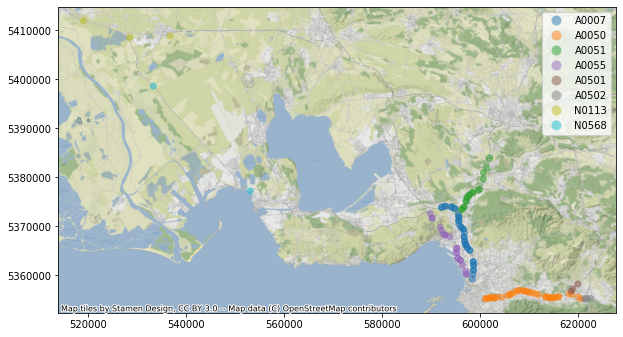

In [61]:
ax = srdt.plot(figsize=(10, 10), alpha=0.5, column='axe',legend=True)
# couleur selon l'axe, il manque L2
ctx.add_basemap(ax,zoom=13)

<Figure size 432x288 with 0 Axes>

279

279


In [14]:
srdt

,ID,axe,PM,commentair,geometry,infos,PRD,PRF,Sens,Axe,SOL2
0,DIRMED_SRDT_000119,A0007,M7I,Agavon_Tr,POINT (884698.002 6259859.435),PME_A7_1_264+687_M7I,264+687,265+187,1,A7,MM713.I
1,DIRMED_SRDT_000121,A0007,M7J,L_ANJOLY,POINT (885065.662 6259489.631),PME_A7_1_265+320_M7J,265+320,265+820,1,A7,MM713.J
2,DIRMED_SRDT_000122,A0007,M7N,LES_PENNES_MIR,POINT (886908.352 6258773.111),PME_A7_1_267+230_M7N,267+230,267+730,1,A7,MM713.N
3,DIRMED_SRDT_000124,A0007,M7O,A55_LES_PENNES,POINT (887531.570 6258833.916),PME_A7_1_267+861_M7O,267+861,268+361,1,A7,MM713.O
4,DIRMED_SRDT_000126,A0007,M7P,None,POINT (887950.220 6258980.552),PME_A7_1_268+288_M7P,268+288,268+788,1,A7,MM713.P
...,...,...,...,...,...,...,...,...,...,...,...
163,DIRMED_SRDT_000172,N0568,MPF,None,POINT (859489.837 6260638.948),PME_RN568_25+350_1_MPF,25+350,26+350,1,N568,MMP13.F
164,DIRMED_SRDT_000168,N0568,MPF,Fos PMV,POINT (855764.954 6263993.900),PME_RN568_25+350_1_MPF,25+350,26+350,1,N568,MMP13.F
165,DIRMED_SRDT_000208,N0568,MBO,Fos Est N568,POINT (859477.063 6260641.631),PME_RN568_30+980_1_MBO,30+980,31+800,1,N568,MMB13.O
166,DIRMED_SRDT_000173,N0568,MPG,None,POINT (844766.462 6275767.152),PME_RN568_9+250_1_MPG,9+250,10+250,1,N568,MMP13.G
